In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
print(f"Using Scikit-Learn version: {sklearn.__version__}")

Using Scikit-Learn version: 1.2.1


# 0. An end to end sciket learn workflow

# Random Forest Classifier Workflow for Classfying Heart Disease

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (all the feature colums)
X = heart_disease.drop("target", axis=1)

# Create Y (target  colum)
y = heart_disease["target"]

# check the head of the features dataframe
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
# Check the head and the value counts of the labels
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 1    165
 0    138
 Name: target, dtype: int64)

In [5]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)# by default
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

# 2. choose the model and hyperparameter 

In [6]:
# Since we are working on a classification problem we'll start with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [7]:
# view the current hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. fit the model to the data and use it to make prediction

In [8]:
clf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [9]:
y_label = clf.predict(np.array([0,2,3,4]))

/Users/manuyadav/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
# in order to predict a label, data has to be in the same shape X_train
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3


In [12]:
# use the model to make a prediction on the test data (further evaluation)
y_preds = clf.predict(X=X_test)

In [13]:
# evaluation
train_acc = clf.score(X=X_train, y=y_train)
print(f"The model accuracy on the traing dataset is: {train_acc*100}%")

The model accuracy on the traing dataset is: 100.0%


In [14]:
# evaluate the model on test data
test_acc = clf.score(X=X_test, y=y_test)
print(f"The model's accuracy on the testing dataset is: {test_acc*100:.2f}%")


The model's accuracy on the testing dataset is: 86.84%


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.81      0.95      0.88        37

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



In [16]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[31,  8],
       [ 2, 35]])

In [17]:
# Compute the accuracy score (same as the score() method for classifiers) 
accuracy_score(y_test, y_preds)


0.868421052631579

In [18]:
# Try different numbers of estimators (trees)... (no cross-validation)
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 100 estimators...
Model accuracy on test set: 86.84%

Trying model with 110 estimators...
Model accuracy on test set: 86.84%

Trying model with 120 estimators...
Model accuracy on test set: 85.53%

Trying model with 130 estimators...
Model accuracy on test set: 85.53%

Trying model with 140 estimators...
Model accuracy on test set: 86.84%

Trying model with 150 estimators...
Model accuracy on test set: 85.53%

Trying model with 160 estimators...
Model accuracy on test set: 82.89%

Trying model with 170 estimators...
Model accuracy on test set: 88.16%

Trying model with 180 estimators...
Model accuracy on test set: 89.47%

Trying model with 190 estimators...
Model accuracy on test set: 85.53%



In [19]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(100, 200, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)

    # Measure the model score on a single train/test split
    model_score = model.score(X_test, y_test)
    print(f"Model accuracy on single test set split: {model_score * 100:.2f}%")
    
    # Measure the mean cross-validation score across 5 different train and test splits
    cross_val_mean = np.mean(cross_val_score(model, X, y, cv=5))
    print(f"5-fold cross-validation score: {cross_val_mean * 100:.2f}%")
    
    print("")


Trying model with 100 estimators...
Model accuracy on single test set split: 86.84%
5-fold cross-validation score: 82.15%

Trying model with 110 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 81.17%

Trying model with 120 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 83.49%

Trying model with 130 estimators...
Model accuracy on single test set split: 86.84%
5-fold cross-validation score: 83.14%

Trying model with 140 estimators...
Model accuracy on single test set split: 86.84%
5-fold cross-validation score: 82.48%

Trying model with 150 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 80.17%

Trying model with 160 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 80.83%

Trying model with 170 estimators...
Model accuracy on single test set split: 84.21%
5-fold cross-validation score: 82.16%

Trying model wit

In [20]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over in dictionary form 
# (these can be any of your target model's hyperparameters) 
param_grid = {'n_estimators': [i for i in range(100, 200, 10)]}

# Setup the grid search
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=param_grid,
                    cv=5,
                    verbose=1) 

# Fit the grid search to the data
grid.fit(X, y)

# Find the best parameters
print(f"The best parameter values are: {grid.best_params_}")
print(f"With a score of: {grid.best_score_*100:.2f}%")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameter values are: {'n_estimators': 120}
With a score of: 82.82%


In [21]:
# set the model to be the best estimator

clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=120)

In [22]:
# Fit the best model
clf = clf.fit(X_train, y_train)

# Find the best model scores on our single test split
# (note: this may be lower than the cross-validation score since it's only on one split of the data)
print(f"Best model score on single split of the data: {clf.score(X_test, y_test)*100:.2f}%")

Best model score on single split of the data: 88.16%


# 6. Save the model for someone else use

In [23]:
import pickle

# save an existing model to file
pickle.dump(model, open("random_forest_model_1.pkl", "wb"))

In [24]:
# load the saved pickle model to file

loaded_pickle_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
print(f"Loaded pickle model prediction score: {loaded_pickle_model.score(X_test, y_test) * 100:.2f}%")


Loaded pickle model prediction score: 88.16%


In [25]:
# for larger data use joblib
from joblib import dump, load

# Save a model using joblib
dump(model, "random_forest_model_1.joblib")

['random_forest_model_1.joblib']

In [26]:
# Load a saved joblib model and evaluate it
loaded_joblib_model = load("random_forest_model_1.joblib")
print(f"Loaded joblib model prediction score: {loaded_joblib_model.score(X_test, y_test) * 100:.2f}%")

Loaded joblib model prediction score: 88.16%


# 1. Getting the data ready

In [27]:
# splitting the data into X & y
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# splitting the data into features (X) and labels (y)
X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [29]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2) # you can change the test size

# Check the shapes of different data splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
# 80% of data is being used for the training set (the model will learn patterns on these samples)
X.shape[0] * 0.8

242.4

In [32]:
# And 20% of the data is being used for the testing set (the model will be evaluated on these samples)
X.shape[0] * 0.2


60.6

# 1.1 Make sure it's all numerical

In [33]:
# import cas-sales-extended.csv
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# split into X and y and train/test
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Try to predict with random forest on price column (doesn't work)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: could not convert string to float: 'Honda'

In [ ]:
# 1. Import OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Define the categorical features to transform
categorical_features = ["Make", "Colour", "Doors"]

# 3. Create an instance of OneHotEncoder
one_hot = OneHotEncoder()

# 4. Create an instance of ColumnTransformer
transformer = ColumnTransformer([("one_hot", # name
                                  one_hot, # transformer
                                  categorical_features)], # columns to transform
                                  remainder="passthrough") # what to do with the rest of the columns? ("passthrough" = leave unchanged) 

# 5. Turn the categorical features into numbers (this will return an array-like sparse matrix, not a DataFrame)
transformed_X = transformer.fit_transform(X)
transformed_X

In [37]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [38]:
# View first transformed sample
transformed_X[0]

NameError: name 'transformed_X' is not defined

In [39]:
# View original first sample
X.iloc[0]


Make             Honda
Colour           White
Odometer (KM)    35431
Doors                4
Name: 0, dtype: object

#  Nuemrically encoding data with pandas

In [40]:
# view head of original DataFrame
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [41]:
# One-hot encode catagorical variables 
categorical_variable = ["Make", "Colour", "Doors"]
dummies = pd.get_dummies(data=car_sales[categorical_variable])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [42]:
# Have to convert doors to object for dummies to work on it...
car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(data=car_sales[["Make", "Colour", "Doors"]],
                         dtype=float)
dummies


/var/folders/44/p6nfhbxj3qv43v729z5902g80000gn/T/ipykernel_3307/1185477911.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(data=car_sales[["Make", "Colour", "Doors"]],


,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [43]:
np.random.seed(42)

# Create train and test splits with transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

# Create the model instance
model = RandomForestRegressor()

# Fit the model on the numerical data (this errored before since our data wasn't fully numeric)
model.fit(X_train, y_train)

# Score the model (returns r^2 metric by default, also called coefficient of determination, higher is better)
model.score(X_test, y_test)

NameError: name 'transformed_X' is not defined

In [44]:
# import tha car sales dataframe with missing values
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
# Get the sum of all missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")


Number of missing X values:
Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64


In [47]:
# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")


Number of missing y values: 50


In [48]:
# -- Let's convert the categorical columns to one hot encoded (code copied from above)
# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [49]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [50]:
car_sales_missing.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# 1.2.1 Fill the missing data with pandas

In [51]:
# Fill the missing values in the Make column
car_sales_missing["Make"].fillna(value="missing", inplace=True)

In [52]:
# Fill the Colour column
car_sales_missing["Colour"].fillna(value="missing", inplace=True)

In [53]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# Find th most comman value of the doors column
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [55]:
# Fill the doors column with the most comman value
car_sales_missing["Doors"].fillna(value=4, inplace=True)

In [56]:
# Fill the Odometer (KM) column
car_sales_missing["Odometer (KM)"].fillna(value=car_sales_missing["Odometer (KM)"].mean(), inplace=True)



In [57]:
# Check the number of missing values
car_sales_missing.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [58]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)


In [59]:
# Check the number of missing values
car_sales_missing.isna().sum()


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [60]:
# Check the number of total samples (previously was 1000)
len(car_sales_missing)


950

In [61]:
# Create features
X_missing = car_sales_missing.drop("Price", axis=1)
print(f"Number of missing X values:\n{X_missing.isna().sum()}")

# Create labels
y_missing = car_sales_missing["Price"]
print(f"Number of missing y values: {y_missing.isna().sum()}")

Number of missing X values:
Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64
Number of missing y values: 0


In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [63]:
# Split data into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing,
                                                    y_missing,
                                                    test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22011714008302485

# -- Filling missing data and transforming catagorical data with Scikit-Learn

Now we've filled the missing columns using pandas functions, you might be thinking, "Why pandas? I thought this was a Scikit-Learn introduction?".

Not to worry, Scikit-Learn provides a class called sklearn.impute.SimpleImputer() which allows us to do a similar thing.

SimpleImputer() transforms data by filling missing values with a given strategy parameter.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.



In [64]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [65]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# Drop the row with missing in the Price column
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [67]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [68]:
# Split into X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [69]:
from sklearn.impute import SimpleImputer

# Crete categorical variable imputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Create Door column imputer
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create Odometer (KM) colun imputer
num_imputer = SimpleImputer(strategy="mean")

In [70]:
# Defie diffrent colun
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

In [71]:
from sklearn.compose import ColumnTransformer

# Create series of column transforms to perform
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

In [72]:
# Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)

# Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [73]:
# Get our transformed data array's back into DataFrame's
filled_X_train_df = pd.DataFrame(filled_X_train, 
                                 columns=["Make", "Colour", "Doors", "Odometer (KM)"])

filled_X_test_df = pd.DataFrame(filled_X_test, 
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
filled_X_train_df.isna().sum()


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [74]:
# Check missing data in the testing set
filled_X_test_df.isna().sum()


Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [75]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [76]:
filled_X_train_df.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [77]:
# Now let's one hot encode the features with the same code as before 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

# Check transformed and filled X_train
transformed_X_train


array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 71934.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 162665.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 42844.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 196225.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 133117.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0]], dtype=object)

In [78]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use the transformed data (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)


0.21229043336119102

# important points
1.Keep your training and test sets separate.
Most datasets you come across won't 
be in a form ready to immediately start using them with machine learning models.
And some may take more preparation than others to get ready to use.

2.For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as feature engineering or feature encoding.

3.Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as data imputation.

# 2. Chossing the right algorithm for the problem

Some things to note:

Scikit-Learn refers to machine learning models and algorithms as estimators.
Classification problem - predicting a category (heart disease or not).
Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
Regression problem - predicting a number (selling price of a car).
Unsupervised problem (data with no labels) - clustering (grouping unlabelled samples with other similar unlabelled samples).

# 2.1 Picking a machine learning problem for a regression problem 

In [79]:
# Get the California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [80]:
# Since its a dictionary convert it into DataFrame for proper inspection
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["targets"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,targets
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [81]:
# how many samples
len(housing_df)

20640

In [82]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels(y)
X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Institate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score() metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.5758549611440126

In [83]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)


0.8059809073051385

# 2.2 Picking a machine learning model for a classification problem

In [84]:
heart_disease = pd.read_csv("heart-disease.csv")

In [85]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
# How many sample are there?
len(heart_disease)

303

In [87]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000, # iterations on the data, 1000 is the default
                dual="auto") # dual="auto" chooses best parameters for the model automatically
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

InvalidParameterError: The 'dual' parameter of LinearSVC must be an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int'. Got 'auto' instead.

In [88]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100) # 100 is the default, but you could try 1000 and see what happens
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

# 3. Fit the model to data using it to make. prediction

# 3.1 Fitting a model to data

In [89]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)


0.8524590163934426

In [90]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [91]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# 3.2 Making predictions using a machine learning model

In [92]:
# use a trained model to make predcitions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [93]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [95]:
# Return probablities rather than labels
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [96]:
# Return labels
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [97]:
# Find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])


array([[0.89, 0.11]])

In [98]:
# Return the label for 1 sample
clf.predict(X_test[:1])

array([0])

In [99]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [100]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)


0.3270458119670544

# 4. Evaluating a model

Scikit-Learn implements 3 different methods of evaluating models.

The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
Problem-specific metric functions available in sklearn.metrics. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.



# 4.1 Genral model evaluation with score()

In [104]:
# Import the RandomForesrClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X(features/data) and y(target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [105]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [106]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);


In [107]:
# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.8059809073051385

# 4.2 Evaluating your models using the scoring parameter


In [108]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [109]:
# Using score()
clf.score(X_test, y_test)

0.8524590163934426

In [110]:
# Using cross_val_score()
cross_val_score(clf, X, y, cv=5) # cv = number of splits to test (5 by default)


array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [111]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [112]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [113]:


cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring value, this can be set to other scoring metrics


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# 4.2.1 Classification model evaluation metrics

In [114]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8524590163934426

In [115]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8524590163934426

# Accuracy


In [116]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


# Area Under Receiver Operating Charactersticks (ROC) Curve

In [117]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

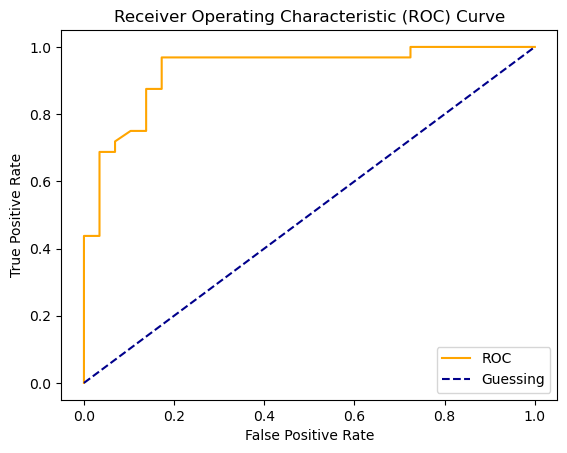

In [118]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [119]:
from sklearn.metrics import roc_auc_score

roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

0.9304956896551724

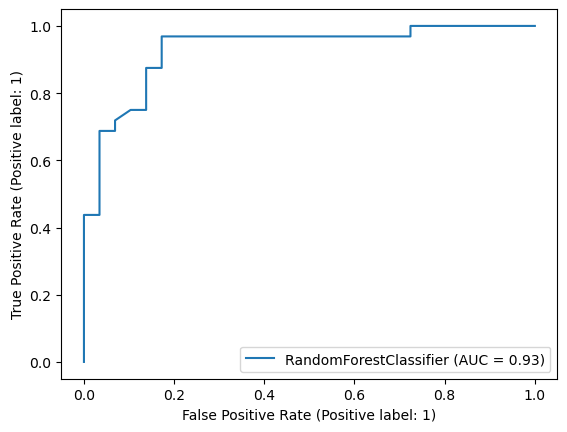

In [120]:
from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, 
                                                   X=X_test, 
                                                   y=y_test)

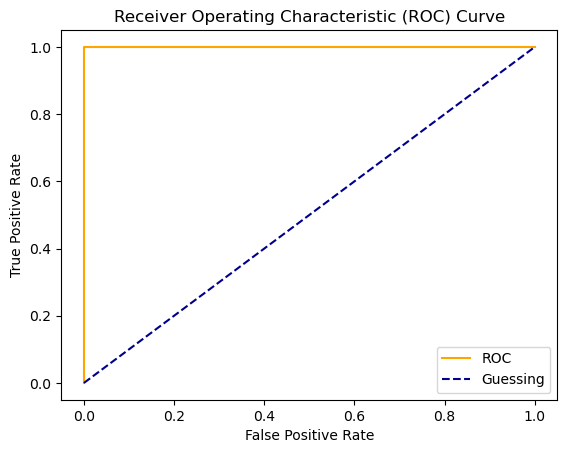

In [121]:
# You can see this by creating a ROC curve using only the y_test labels.
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [122]:
# Perfect ROC ACU score
roc_auc_score(y_test, y_test)

1.0

# Confusion matrix

In [123]:
# A confusion matrix is quick way to compare the labels a model predicts and the actual labels it was supposed to predict
# In essence, giving you an idea where the model is getting confused

from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [124]:
# visualizing using pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


# Creating a confusion matrix using sciket learn

In [125]:
import sklearn
sklearn.__version__

'1.2.1'

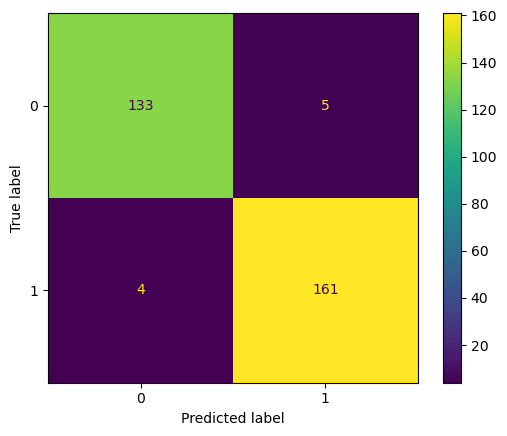

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

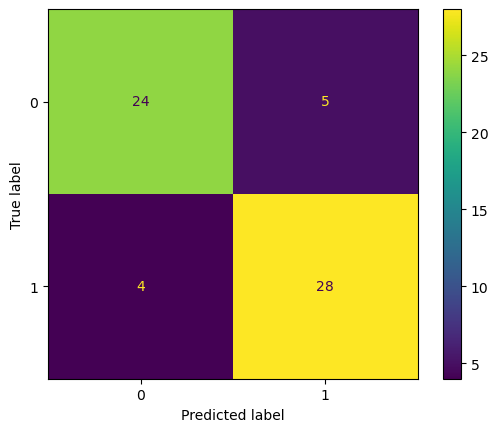

In [127]:
# Plot confusion matrix from prediction
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);


# Classification report

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [129]:
# Where precison and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000)
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True,
                                  zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# 4.2.2 Regression model evaluation metrics

In [130]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into features (X) and labels (y)
X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

# R^2 Score(coefficent of determination)

In [133]:
# Calculate the models R^2 score
model.score(X_test, y_test)

0.8059809073051385

In [134]:
# Outside of the score() function, R^2 can be calculated using r2_score() function
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [135]:
# and a perfect model would get a score of 1.0
r2_score(y_test,y_test)

1.0

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

# Mean Absolute Error (MAE)



In [136]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3270458119670544

In [137]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df


,actual values,predictions
20046,0.47700,0.490580
3024,0.45800,0.759890
15663,5.00001,4.935016
20484,2.18600,2.558640
9814,2.78000,2.334610
...,...,...
15362,2.63300,2.225000
16623,2.66800,1.972540
18086,5.00001,4.853989
2144,0.72300,0.714910


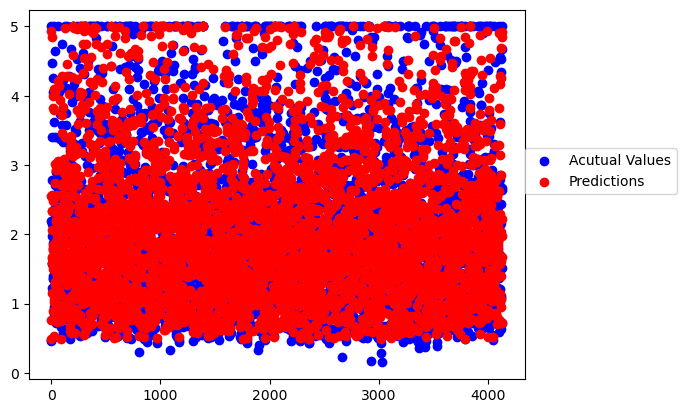

In [138]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));


# Mean Squared Error

In [139]:
# Mean Squared Errorr
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

# 4.2.3 Evaluatin a model using the scoring parameter

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [141]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [142]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [143]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X,y,cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [144]:
# Let's try "precision".
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")


The cross-validated precision is: 0.83


In [145]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")


The cross-validated recall is: 0.85


In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

model = RandomForestRegressor(n_estimators=100)


In [147]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65


In [148]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")


The cross-validated MAE score is: -0.47


In [149]:
np.random.seed(42)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")


The cross-validated MSE score is: -0.43


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("targets", axis=1)
y = housing_df["targets"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100, 
                              n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")


Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


# 5. Improving model prediction through experimentation (Hyperparameter tuning)

In [154]:
# instantiate a RandomForestClassifier
clf = RandomForestClassifier()

In [155]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 5.1 Tuning hyperparameter by hand


In [156]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [157]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Read in the data
heart_disease = pd.read_csv("heart-disease.csv")

# Split into X (features) & y (labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [159]:
# Check the sizes of the splits
print(f"Training data: {len(X_train)} samples, {len(y_train)} labels")
print(f"Validation data: {len(X_valid)} samples, {len(y_valid)} labels")
print(f"Testing data: {len(X_test)} samples, {len(y_test)} labels")

Training data: 212 samples, 212 labels
Validation data: 45 samples, 45 labels
Testing data: 46 samples, 46 labels


In [160]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Acc: 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


In [161]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Acc: 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


# 5.2 Hyperparameter tuning with RandomizedSearchCV


In [162]:
# Hyperparameter grid RandomizedSearchCV will search over
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

In [163]:
# Count the total number of hyperparameter combinations to test
total_randomized_hyperparameter_combintions_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combintions_to_test} potential combinations of hyperparameters to test.")


There are 1440 potential combinations of hyperparameters to test.


In [164]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train);

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   0.1s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50

In [168]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [179]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)


Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


# 5.3 Hyperparameter tuning with GridSearchCV

In [171]:
param_distributions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

In [172]:
# Create hyperparameter grid similar to rs_clf.best_params_
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}


In [173]:
# Count the total number of hyperparameter combinations to test
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} combinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combintions_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
 than before (previous: {total_randomized_hyperparameter_combintions_to_test}).")


There are 24 combinations of hyperparameters to test.
This is 60.0 times less than before (previous: 1440).


In [174]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available machine cores (if this produces errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

# Find the running time
end_time = time.time()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

In [175]:
# How long did it take? 
total_time = end_time - start_time
print(f"[INFO] The total running time for running GridSearchCV was {total_time:.2f} seconds.")


[INFO] The total running time for running GridSearchCV was 19.03 seconds.


In [176]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_


{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [177]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

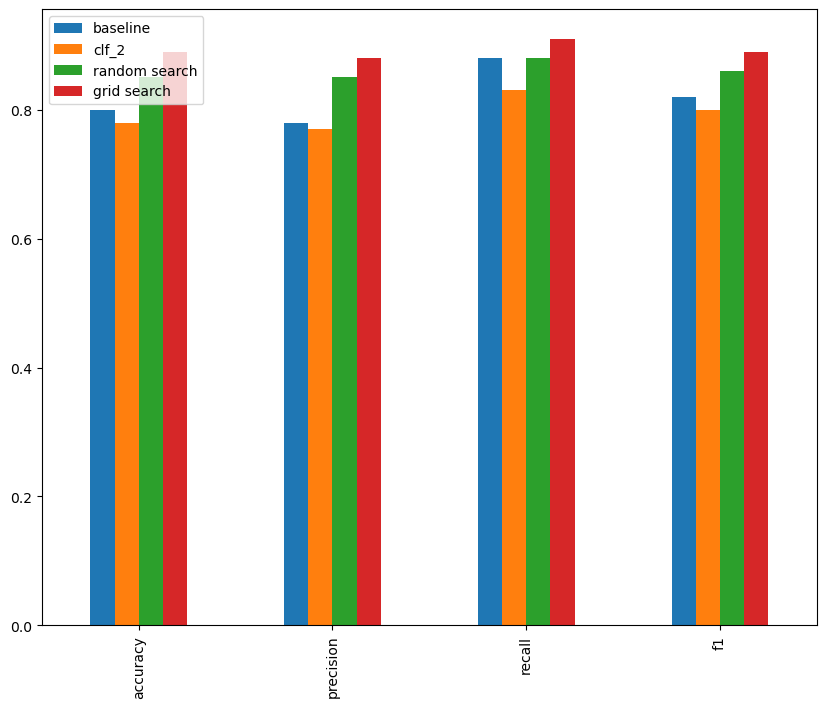

In [180]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

# 6. Saving and loading trained machine learning models


# 6.1 Saving and loading a model with pickle

In [181]:
import pickle

# Save an existing model to file
best_model_file_name_pickle = "gs_random_forest_model_1.pkl" 
pickle.dump(gs_clf, open(best_model_file_name_pickle, "wb"))

In [182]:
# Load a saved model
loaded_pickle_model = pickle.load(open(best_model_file_name_pickle, "rb"))

In [183]:
# Make prediction and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [184]:
loaded_pickle_model_metrics == gs_metrics

True

# 6.2 Saving and loading a model with joblib

In [185]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib)

['gs_random_forest_model_1.joblib']

In [186]:
# Import a saved joblib model
loaded_joblib_model = load(filename=best_model_file_name_joblib)

In [187]:
# Make and evaluate joblib prediction
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [188]:
loaded_joblib_model_metrics == gs_metrics

True

# 7. Revsiting the entire pipeline

In [189]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [190]:
data.dtypes


Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [191]:
data.isna().sum()


Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [193]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [194]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [195]:
# Score the best model
gs_model.score(X_test, y_test)

0.2848784564026805